In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import sys
sys.path.append('../src/')

In [3]:
# set plotting params
import matplotlib as mpl
import plots
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.reload_library()
rcparams = plots.stdrcparams()
mpl.rcParams.update(rcparams)

from preprocess import *
from settings import *

In [4]:
dp_dir = r'../data/calculated/dp'

# script

In [5]:
dfs = []
for filename in os.listdir(os.path.join(dp_dir, '240521_holdout')):
    if filename.startswith('carpediem')&('CarryLastForward_limit2_' in filename):
        parts = filename.replace('carpediem_', '').replace('CarryLastForward_limit2_', '').replace('.csv', '').split('_')
        # print(parts)
        feature_set = parts[0]
        scaler_name = parts[1]
        n_pc = parts[2].replace('PC', '')
        boot = parts[-1].replace('boot', '').replace('pdist', 'all')

        file_path = os.path.join(dp_dir, '240521_holdout', filename)

        df = pd.read_csv(file_path, index_col=0)
        df['dataset'] = 'carpediem'
        df['feature_set'] = feature_set
        df['n_pc'] = n_pc
        df['boot'] = boot

        dfs.append(df)
        # break
    # break


In [6]:
dps = pd.concat(dfs, ignore_index=True)
# dps.drop(columns=['index'], inplace=True)

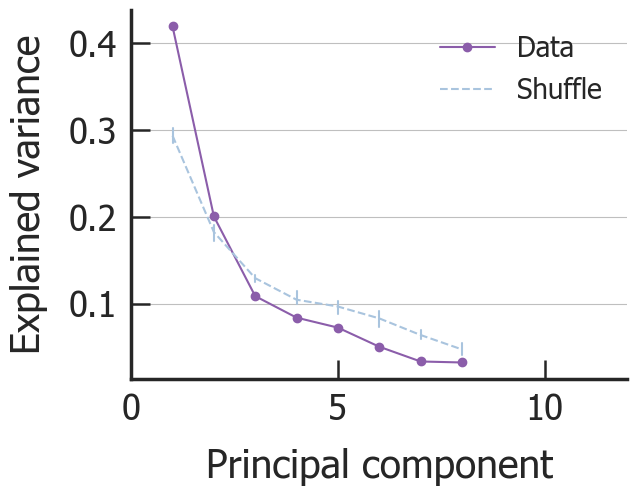

In [7]:
feature_set = 'sofs'
n_boot = 100

# fig, ax = plt.subplots(1,1, figsize=plots.stdfigsize(1,1))

data, _ = load_and_prepare_dataset(dataset='carpediem', feature_set=feature_set, \
                                imputation_strategy='CarryLastForward_limit2', scaler_name='KBD', holdout=.1)
num_pc = data.shape[1]-1
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])

data_boot = data_bootstrap(data, n_boot, se=9)
df = pd.DataFrame()
for boot in range(n_boot):
    data_boot_ = data_boot[boot]
    data_v = PCA(n_components=data_boot_.shape[1]-1).fit(data_boot_.iloc[:,:-1]).explained_variance_ratio_
    shuffle_v = PCA().fit(data_randomize(data_boot_.iloc[:,:-1])).explained_variance_ratio_
    df = pd.concat([df, pd.DataFrame({'Data':data_v, 'Shuffle':shuffle_v, 'Principal component':list(range(1, data_boot_.shape[1])), 'Boot':boot})])
df = df.assign(dif_info = lambda x: x.Data - x.Shuffle)


plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, label='Data', marker='o', color='#8b5daa')
plt.xlim([0, 12])
sns.lineplot(
    data=df, x='Principal component', y='Shuffle', 
    errorbar=lambda x: np.percentile(x, [5,95]), err_style='bars', 
    label='Shuffle', linestyle='--', color='#a9c4de'
)
plt.legend(frameon=False)
plt.ylabel('Explained variance')
plt.grid(True, axis='y', c='Gray', alpha=.5)
# ax.set_xticks(range(0, 12, 2))

In [8]:
num_pc = 2
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])
loadings = pca.components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pcaX = pd.DataFrame(pcaX, columns=pc_list, index=data.index)
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['variable'] = data.iloc[:,:-1].columns.values
loadings = loadings.set_index('variable')

In [9]:
loadings_sofs = loadings.copy()

In [10]:
top_features_combined = [
    'GCS_motor_response', 
    'GCS_eye_opening',
    'GCS_verbal_response',
    'renal_points',
    'platelet_points',
]

Text(11.27777777777776, 0.5, '')

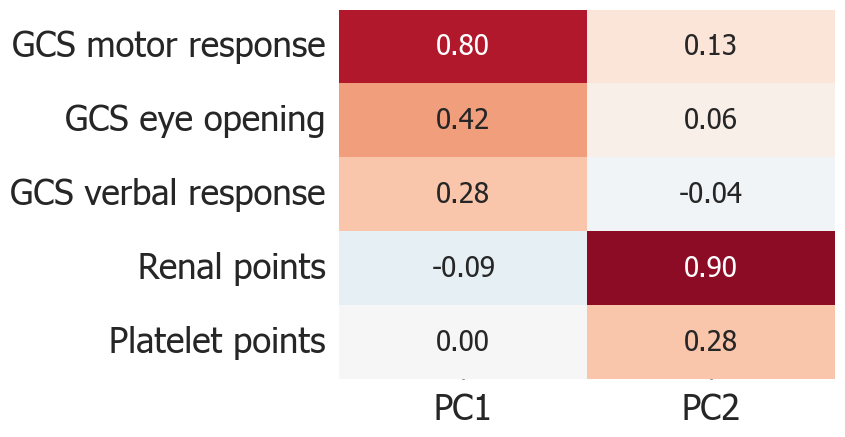

In [11]:
sns.heatmap(
    loadings.loc[top_features_combined, pc_list[:max(4, num_pc)]], 
    annot=True, cmap='RdBu_r', annot_kws={'size': 20}, fmt='.2f', 
    center=0, cbar_kws={'label': 'Loading'}, vmax=1, vmin=-1, cbar=False, 
    yticklabels=[
        'GCS motor response', 
        'GCS eye opening',
        'GCS verbal response',
        'Renal points',
        'Platelet points',
    ]
)
plt.ylabel('')

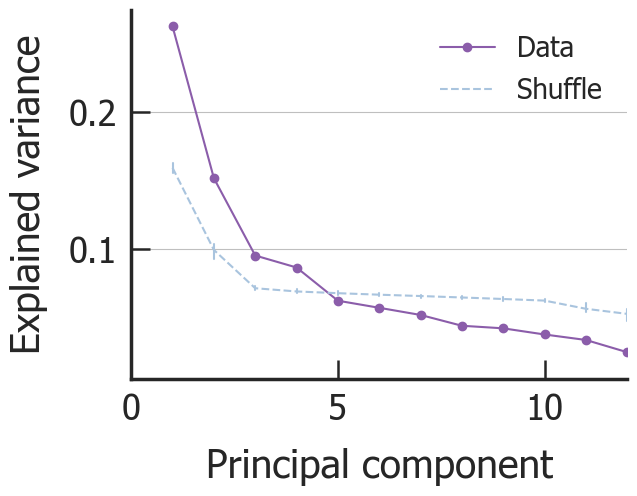

In [12]:
feature_set = 'sofs+vtls'
n_boot = 100

# fig, ax = plt.subplots(1,1, figsize=plots.stdfigsize(1,1))

data, _ = load_and_prepare_dataset(dataset='carpediem', feature_set=feature_set, \
                                imputation_strategy='CarryLastForward_limit2', scaler_name='KBD', holdout=.1)
num_pc = data.shape[1]-1
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])

data_boot = data_bootstrap(data, n_boot, se=9)
df = pd.DataFrame()
for boot in range(n_boot):
    data_boot_ = data_boot[boot]
    data_v = PCA(n_components=data_boot_.shape[1]-1).fit(data_boot_.iloc[:,:-1]).explained_variance_ratio_
    shuffle_v = PCA().fit(data_randomize(data_boot_.iloc[:,:-1])).explained_variance_ratio_
    df = pd.concat([df, pd.DataFrame({'Data':data_v, 'Shuffle':shuffle_v, 'Principal component':list(range(1, data_boot_.shape[1])), 'Boot':boot})])
df = df.assign(dif_info = lambda x: x.Data - x.Shuffle)


plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, label='Data', marker='o', color='#8b5daa')
plt.xlim([0, 12])
sns.lineplot(
    data=df, x='Principal component', y='Shuffle', 
    errorbar=lambda x: np.percentile(x, [5,95]), err_style='bars', 
    label='Shuffle', linestyle='--', color='#a9c4de'
)
plt.legend(frameon=False)
plt.ylabel('Explained variance')
plt.grid(True, axis='y', c='Gray', alpha=.5)
# ax.set_xticks(range(0, 12, 2))

In [13]:
num_pc = 4
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])
loadings = pca.components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pcaX = pd.DataFrame(pcaX, columns=pc_list, index=data.index)
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['variable'] = data.iloc[:,:-1].columns.values
loadings = loadings.set_index('variable')

In [14]:
loadings_sofs_vtls = loadings.copy()

In [15]:
loadings_merged = loadings_sofs.merge(loadings_sofs_vtls, on='variable', suffixes=('_sofs', '_sofs_vtls'), how='outer')

In [16]:
top_features_combined = [
    'GCS_motor_response', 
    'htn_points',
    'renal_points',
    'Systolic_blood_pressure',
    'Heart_rate',
    'Respiratory_rate'
]

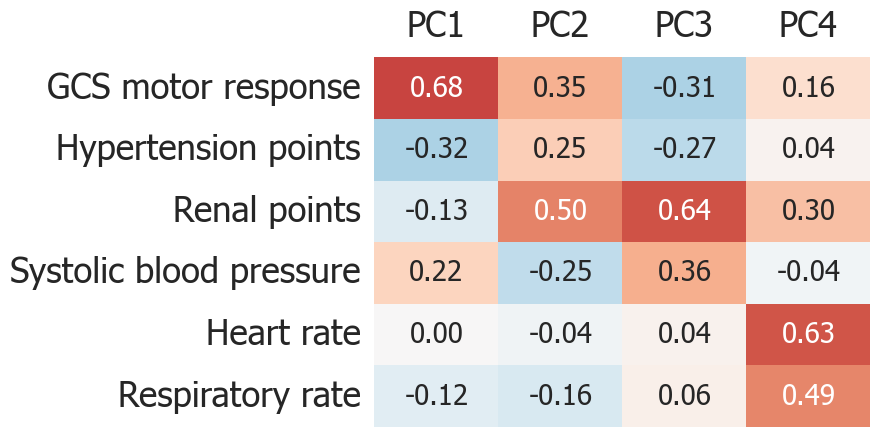

In [17]:
sns.heatmap(
    loadings.loc[top_features_combined, pc_list[:max(4, num_pc)]], 
    annot=True, cmap='RdBu_r', annot_kws={'size': 20}, fmt='.2f', 
    center=0, cbar_kws={'label': 'Loading'}, vmax=1, vmin=-1, cbar=False, 
    yticklabels=[
        'GCS motor response', 
        'Hypertension points',
        'Renal points',
        'Systolic blood pressure',
        'Heart rate',
        'Respiratory rate'
    ]
)
plt.ylabel('')
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

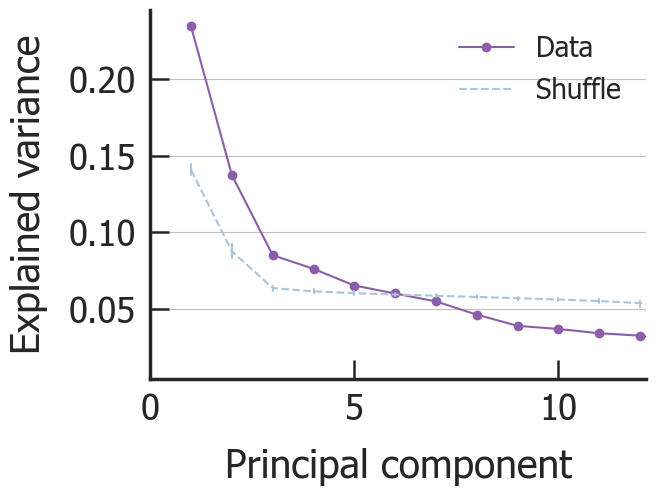

In [18]:
feature_set = 'sofs+vtls+dmos1'
n_boot = 100

# fig, ax = plt.subplots(1,1, figsize=plots.stdfigsize(1,1))

data, _ = load_and_prepare_dataset(dataset='carpediem', feature_set=feature_set, \
                                imputation_strategy='CarryLastForward_limit2', scaler_name='KBD', holdout=.1)
num_pc = data.shape[1]-1
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])

data_boot = data_bootstrap(data, n_boot, se=9)
df = pd.DataFrame()
for boot in range(n_boot):
    data_boot_ = data_boot[boot]
    data_v = PCA(n_components=data_boot_.shape[1]-1).fit(data_boot_.iloc[:,:-1]).explained_variance_ratio_
    shuffle_v = PCA().fit(data_randomize(data_boot_.iloc[:,:-1])).explained_variance_ratio_
    df = pd.concat([df, pd.DataFrame({'Data':data_v, 'Shuffle':shuffle_v, 'Principal component':list(range(1, data_boot_.shape[1])), 'Boot':boot})])
df = df.assign(dif_info = lambda x: x.Data - x.Shuffle)


plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, label='Data', marker='o', color='#8b5daa')
plt.xlim([0, 12.15])
sns.lineplot(
    data=df, x='Principal component', y='Shuffle', 
    errorbar=lambda x: np.percentile(x, [5,95]), err_style='bars', 
    label='Shuffle', linestyle='--', color='#a9c4de'
)
plt.legend(frameon=False)
plt.ylabel('Explained variance')
plt.grid(True, axis='y', c='Gray', alpha=.5)
# ax.set_xticks(range(0, 12, 2))

In [19]:
num_pc = 5
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])
loadings = pca.components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pcaX = pd.DataFrame(pcaX, columns=pc_list, index=data.index)
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['variable'] = data.iloc[:,:-1].columns.values
loadings = loadings.set_index('variable')

In [20]:
loadings_sofs_vtls_dmos1 = loadings.copy()

In [21]:
loadings_merged = loadings_merged.merge(loadings_sofs_vtls_dmos1, on='variable', suffixes=('_sofs_vtls', '_sofs_vtls_dmos1'), how='outer')

In [22]:
top_features_combined = [
    'GCS_motor_response', 
    'htn_points',
    'renal_points',
    'Systolic_blood_pressure',
    'Heart_rate',
    'Respiratory_rate', 
    'Age'
]

Text(11.27777777777776, 0.5, '')

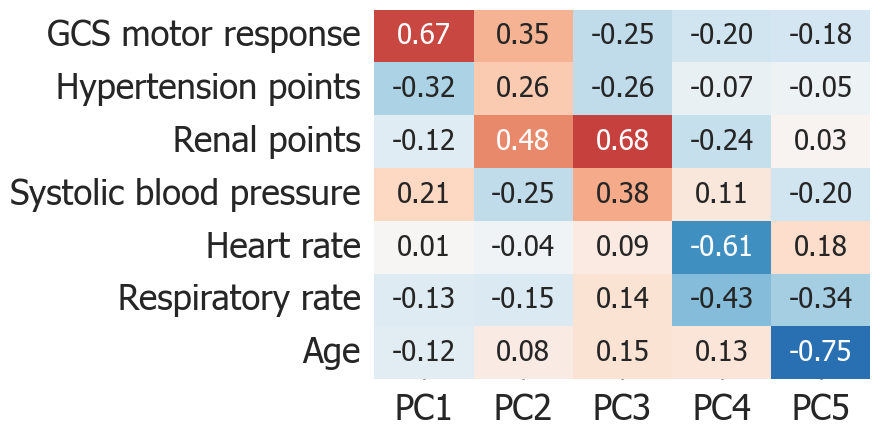

In [23]:
sns.heatmap(
    loadings.loc[top_features_combined, pc_list[:max(4, num_pc)]], 
    annot=True, cmap='RdBu_r', annot_kws={'size': 20}, fmt='.2f', 
    center=0, cbar_kws={'label': 'Loading'}, vmax=1, vmin=-1, cbar=False, 
    yticklabels=[
        'GCS motor response', 
        'Hypertension points',
        'Renal points',
        'Systolic blood pressure',
        'Heart rate',
        'Respiratory rate',
        'Age'
    ]
)
plt.ylabel('')

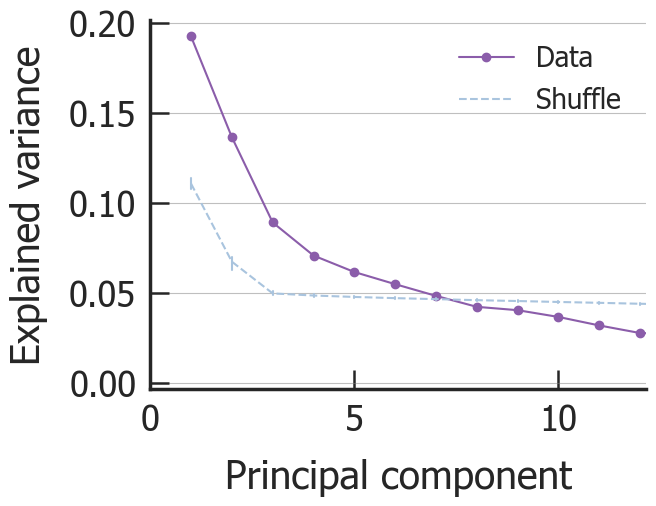

In [24]:
feature_set = 'sofs+vtls+dmos1+lbs1'
n_boot = 100

# fig, ax = plt.subplots(1,1, figsize=plots.stdfigsize(1,1))

data, _ = load_and_prepare_dataset(dataset='carpediem', feature_set=feature_set, \
                                imputation_strategy='CarryLastForward_limit2', scaler_name='KBD', holdout=.1)
num_pc = data.shape[1]-1
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])

data_boot = data_bootstrap(data, n_boot, se=9)
df = pd.DataFrame()
for boot in range(n_boot):
    data_boot_ = data_boot[boot]
    data_v = PCA(n_components=data_boot_.shape[1]-1).fit(data_boot_.iloc[:,:-1]).explained_variance_ratio_
    shuffle_v = PCA().fit(data_randomize(data_boot_.iloc[:,:-1])).explained_variance_ratio_
    df = pd.concat([df, pd.DataFrame({'Data':data_v, 'Shuffle':shuffle_v, 'Principal component':list(range(1, data_boot_.shape[1])), 'Boot':boot})])
df = df.assign(dif_info = lambda x: x.Data - x.Shuffle)


plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, label='Data', marker='o', color='#8b5daa')
plt.xlim([0, 12.15])
sns.lineplot(
    data=df, x='Principal component', y='Shuffle', 
    errorbar=lambda x: np.percentile(x, [5,95]), err_style='bars', 
    label='Shuffle', linestyle='--', color='#a9c4de'
)
plt.legend(frameon=False)
plt.ylabel('Explained variance')
plt.grid(True, axis='y', c='Gray', alpha=.5)
# ax.set_xticks(range(0, 12, 2))

In [25]:
num_pc = 6
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])
loadings = pca.components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pcaX = pd.DataFrame(pcaX, columns=pc_list, index=data.index)
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['variable'] = data.iloc[:,:-1].columns.values
loadings = loadings.set_index('variable')

In [26]:
loadings_merged = loadings_merged.merge(loadings, on='variable', how='outer', suffixes=('_sofs_vtls_dmos1', '_sofs_vtls_dmos1_lbs1'))

In [27]:
top_features_combined = [
    'GCS_motor_response', 
    'renal_points',
    'Creatinine',
    'Platelets',
    'Heart_rate',
    'Respiratory_rate', 
    'WBC_count', 
]

Text(11.27777777777776, 0.5, '')

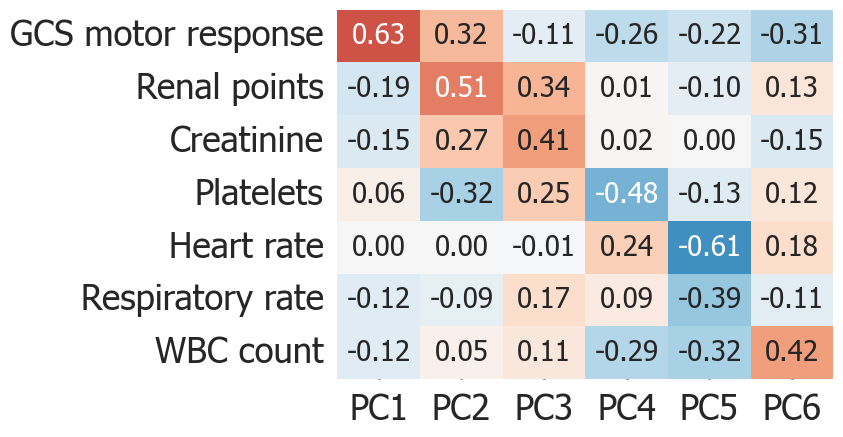

In [28]:
sns.heatmap(
    loadings.loc[top_features_combined, pc_list[:max(4, num_pc)]], 
    annot=True, cmap='RdBu_r', annot_kws={'size': 20}, fmt='.2f', 
    center=0, cbar_kws={'label': 'Loading'}, vmax=1, vmin=-1, cbar=False, 
    yticklabels=[
        'GCS motor response', 
        'Renal points',
        'Creatinine',
        'Platelets',
        'Heart rate',
        'Respiratory rate',
        'WBC count'
    ]
)
plt.ylabel('')

## comparison

In [29]:
loadings_merged = loadings_merged.rename(columns={'PC3': 'PC3_sofs_vtls_dmos1_lbs1', 'PC4': 'PC4_sofs_vtls_dmos1_lbs1', 'PC6': 'PC6_sofs_vtls_dmos1_lbs1'})

In [30]:
loadings_merged = loadings_merged.loc[:, [
    'PC1_sofs', 'PC1_sofs_vtls', 'PC1_sofs_vtls_dmos1', 'PC1_sofs_vtls_dmos1_lbs1', 
    'PC2_sofs', 'PC2_sofs_vtls', 'PC2_sofs_vtls_dmos1', 'PC2_sofs_vtls_dmos1_lbs1', 
    'PC3_sofs_vtls', 'PC3_sofs_vtls_dmos1', 'PC3_sofs_vtls_dmos1_lbs1', 
    'PC4_sofs_vtls', 'PC4_sofs_vtls_dmos1', 'PC5_sofs_vtls_dmos1_lbs1',
    'PC5_sofs_vtls_dmos1', 'PC4_sofs_vtls_dmos1_lbs1',
    'PC6_sofs_vtls_dmos1_lbs1'
]]

In [31]:
tmp = pd.DataFrame(cosine_similarity(loadings_merged.fillna(0).T), index=loadings_merged.columns, columns=loadings_merged.columns)

[Text(0.5, 0, 'PC1_sofs'),
 Text(1.5, 0, 'PC1_sofs_vtls'),
 Text(2.5, 0, 'PC1_sofs_vtls_dmos1'),
 Text(3.5, 0, 'PC1_sofs_vtls_dmos1_lbs1'),
 Text(4.5, 0, 'PC2_sofs'),
 Text(5.5, 0, 'PC2_sofs_vtls'),
 Text(6.5, 0, 'PC2_sofs_vtls_dmos1'),
 Text(7.5, 0, 'PC2_sofs_vtls_dmos1_lbs1'),
 Text(8.5, 0, 'PC3_sofs_vtls'),
 Text(9.5, 0, 'PC3_sofs_vtls_dmos1'),
 Text(10.5, 0, 'PC3_sofs_vtls_dmos1_lbs1'),
 Text(11.5, 0, 'PC4_sofs_vtls'),
 Text(12.5, 0, 'PC4_sofs_vtls_dmos1'),
 Text(13.5, 0, 'PC5_sofs_vtls_dmos1_lbs1'),
 Text(14.5, 0, 'PC5_sofs_vtls_dmos1'),
 Text(15.5, 0, 'PC4_sofs_vtls_dmos1_lbs1'),
 Text(16.5, 0, 'PC6_sofs_vtls_dmos1_lbs1')]

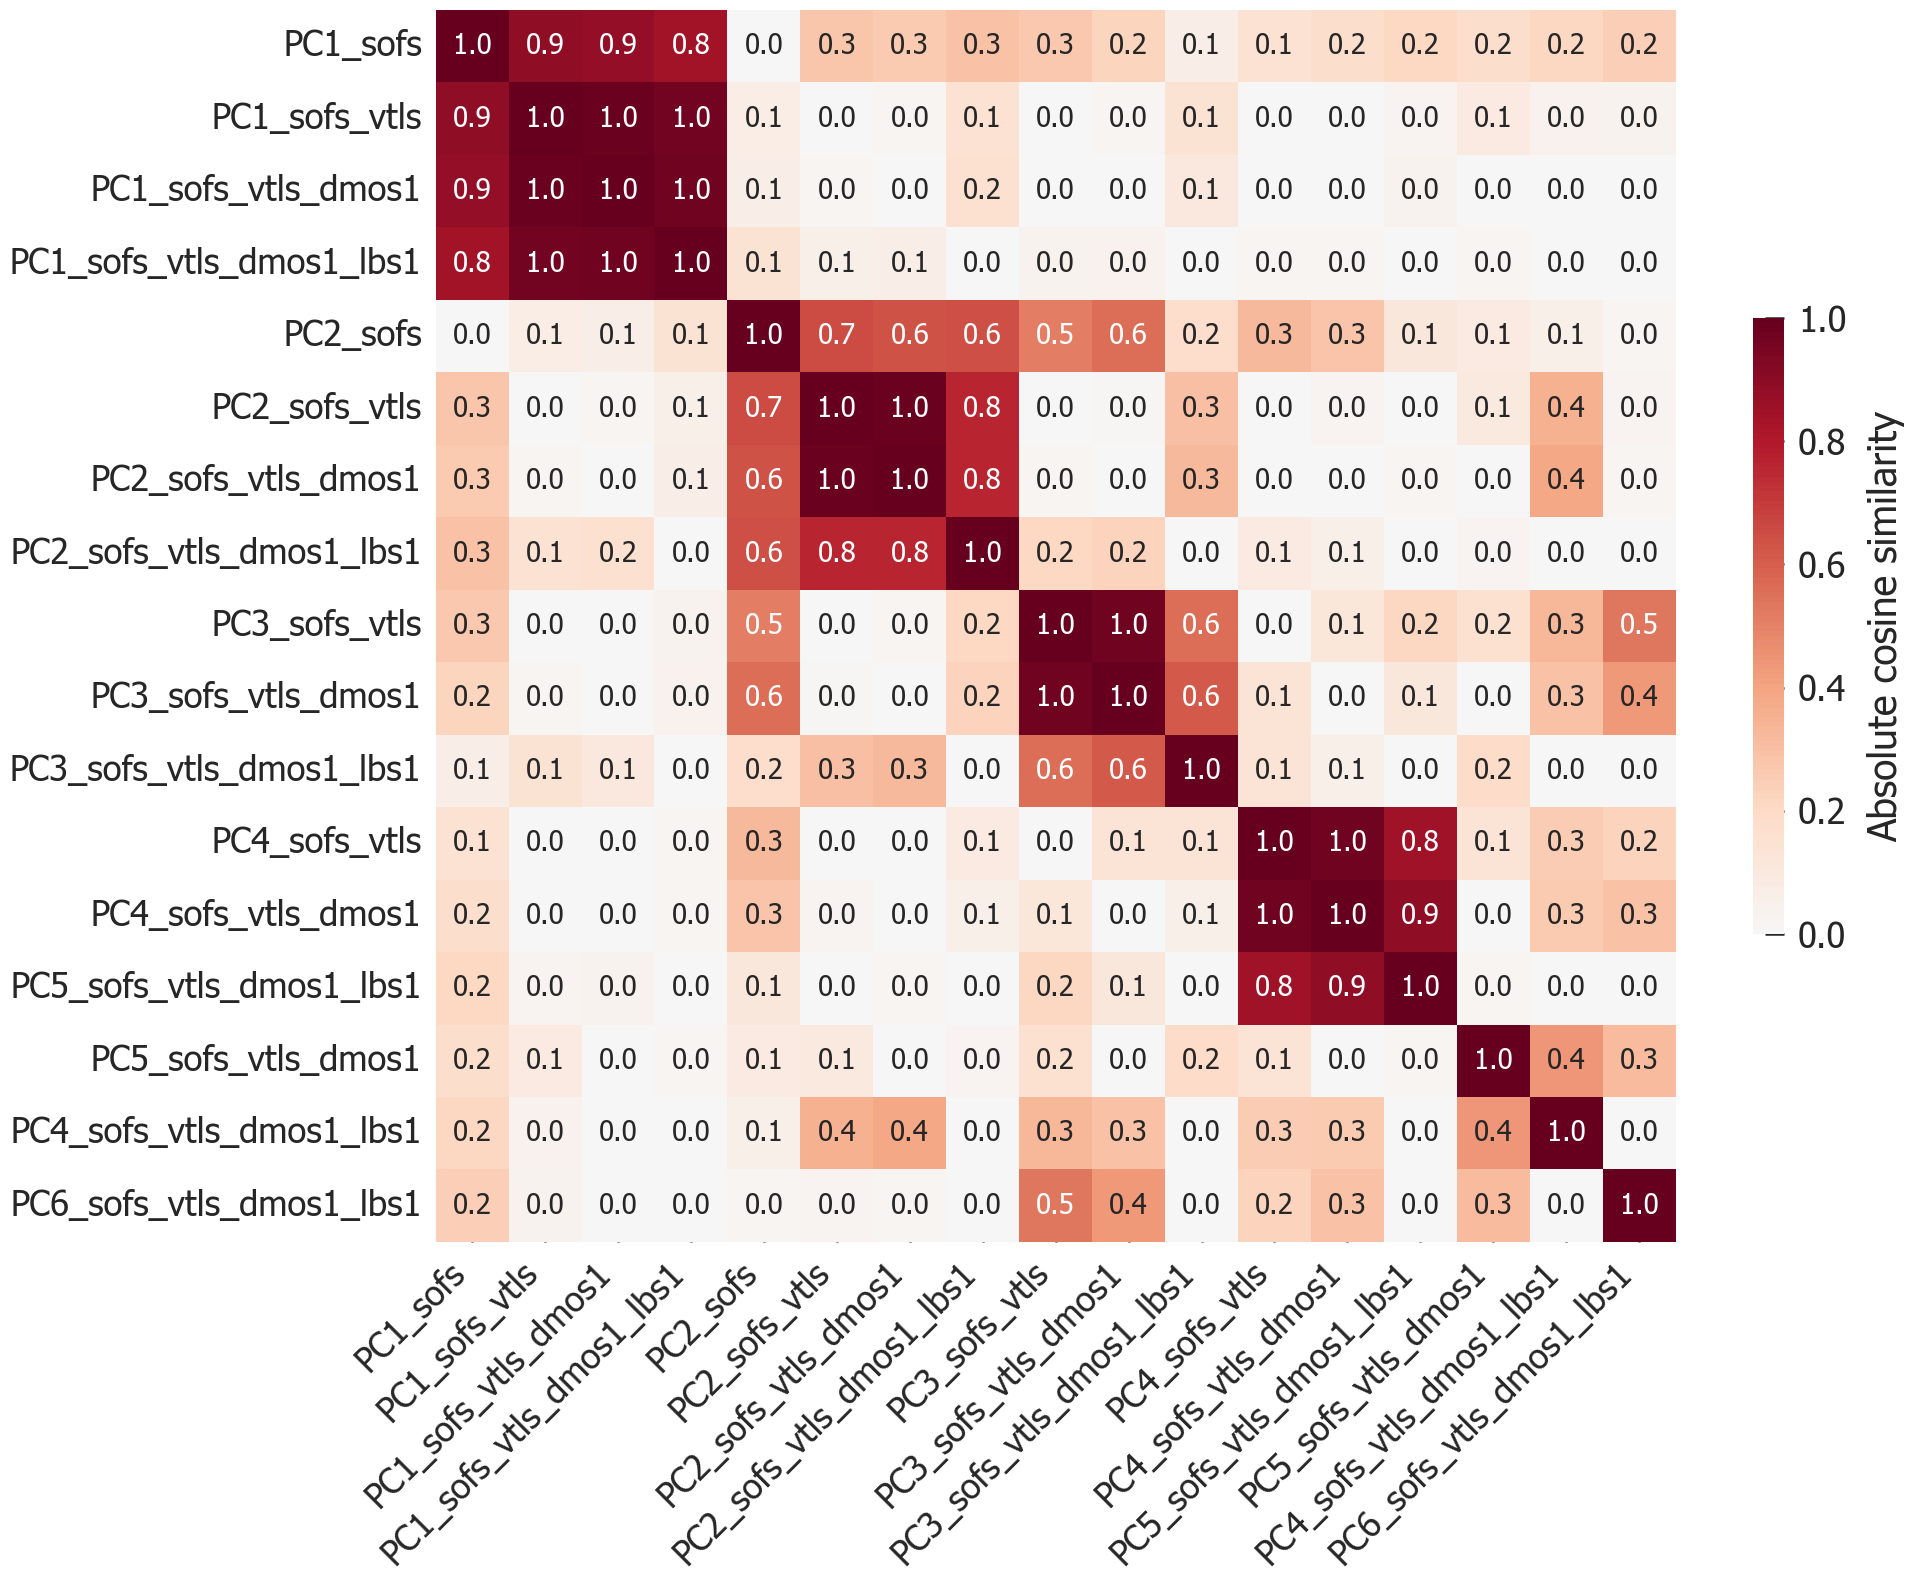

In [32]:
plt.figure(figsize=(20,16))
g = sns.heatmap(tmp.abs(), cmap='RdBu_r', annot=True, annot_kws={'size': 20}, fmt='.1f', center=0, cbar_kws={'label': 'Absolute cosine similarity', 'shrink':.5}, vmax=1, vmin=0)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, ha='right')

# mimic

In [33]:
dfs = []
for filename in os.listdir(os.path.join(dp_dir, '240521_holdout')):
    if filename.startswith('mimic')&('Complete_cases' in filename):
        parts = filename.replace('mimic_', '').replace('Complete_cases_', '').replace('.csv', '').split('_')
        # print(parts)
        feature_set = parts[0]
        scaler_name = parts[1]
        n_pc = parts[2].replace('PC', '')
        boot = parts[-1].replace('boot', '').replace('pdist', 'all')

        file_path = os.path.join(dp_dir, '240521_holdout', filename)

        df = pd.read_csv(file_path, index_col=0)
        df['dataset'] = 'mimic'
        df['feature_set'] = feature_set
        df['n_pc'] = n_pc
        df['boot'] = boot

        dfs.append(df)
        # break
    # break


In [34]:
dps = pd.concat(dfs, ignore_index=True)
# dps.drop(columns=['index'], inplace=True)

In [35]:
dps[dps.boot=='all'].groupby(['feature_set', 'n_pc']).size()

feature_set          n_pc
sofs                 2       45963
sofs+vtls            4       46029
                     5       46029
sofs+vtls+dmos       6       32612
sofs+vtls+dmos+lbs1  12      31429
sofs+vtls+dmos+lbs2  12      16926
dtype: int64

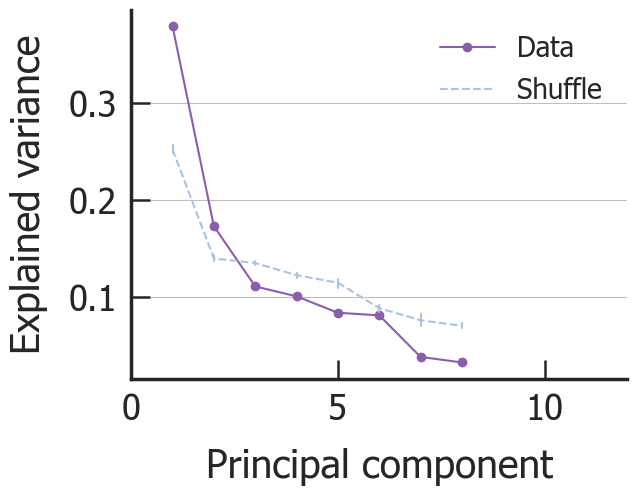

In [36]:
feature_set = 'sofs'
n_boot = 100

# fig, ax = plt.subplots(1,1, figsize=plots.stdfigsize(1,1))

data, _ = load_and_prepare_dataset(dataset='mimic', feature_set=feature_set, \
                                imputation_strategy='Complete_cases', scaler_name='MM', holdout=.5)
num_pc = data.shape[1]-1
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])

data_boot = data_bootstrap(data, n_boot, se=9)
df = pd.DataFrame()
for boot in range(n_boot):
    data_boot_ = data_boot[boot]
    data_v = PCA(n_components=data_boot_.shape[1]-1).fit(data_boot_.iloc[:,:-1]).explained_variance_ratio_
    shuffle_v = PCA().fit(data_randomize(data_boot_.iloc[:,:-1])).explained_variance_ratio_
    df = pd.concat([df, pd.DataFrame({'Data':data_v, 'Shuffle':shuffle_v, 'Principal component':list(range(1, data_boot_.shape[1])), 'Boot':boot})])
df = df.assign(dif_info = lambda x: x.Data - x.Shuffle)


plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, label='Data', marker='o', color='#8b5daa')
plt.xlim([0, 12])
sns.lineplot(
    data=df, x='Principal component', y='Shuffle', 
    errorbar=lambda x: np.percentile(x, [5,95]), err_style='bars', 
    label='Shuffle', linestyle='--', color='#a9c4de'
)
plt.legend(frameon=False)
plt.ylabel('Explained variance')
plt.grid(True, axis='y', c='Gray', alpha=.5)
# ax.set_xticks(range(0, 12, 2))

In [37]:
num_pc = 2
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])
loadings = pca.components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pcaX = pd.DataFrame(pcaX, columns=pc_list, index=data.index)
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['variable'] = data.iloc[:,:-1].columns.values
loadings = loadings.set_index('variable')

In [38]:
top_features_combined = [
    'gcs_verbal',
    'gcs_eyes',
    'gcs_motor',
    'renal_24hours',
    'coagulation_24hours'
]

Text(11.27777777777776, 0.5, '')

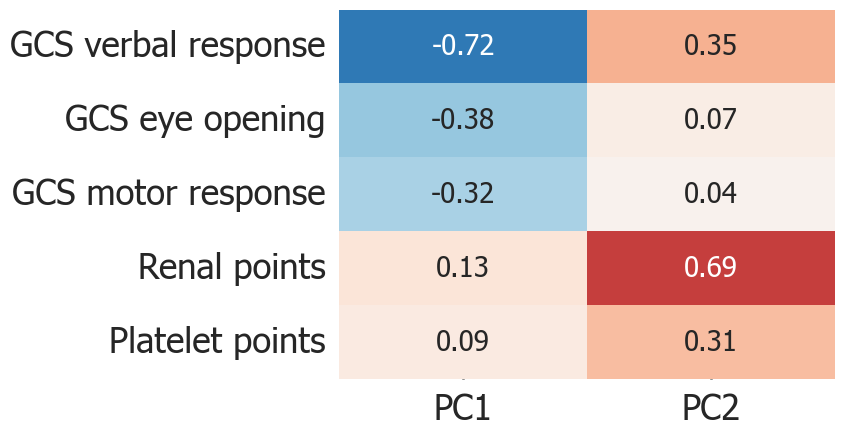

In [39]:
sns.heatmap(
    loadings.loc[top_features_combined, pc_list[:max(4, num_pc)]], 
    annot=True, cmap='RdBu_r', annot_kws={'size': 20}, fmt='.2f', 
    center=0, cbar_kws={'label': 'Loading'}, vmax=1, vmin=-1, cbar=False, 
    yticklabels=['GCS verbal response', 'GCS eye opening', 'GCS motor response', 'Renal points', 'Platelet points']
)
plt.ylabel('')

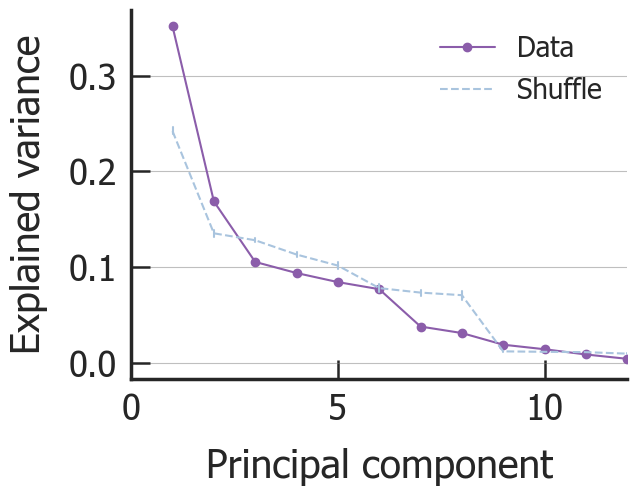

In [40]:
feature_set = 'sofs+vtls'
n_boot = 100

# fig, ax = plt.subplots(1,1, figsize=plots.stdfigsize(1,1))

data, _ = load_and_prepare_dataset(dataset='mimic', feature_set=feature_set, \
                                imputation_strategy='Complete_cases', scaler_name='MM', holdout=.5)
num_pc = data.shape[1]-1
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])

data_boot = data_bootstrap(data, n_boot, se=9)
df = pd.DataFrame()
for boot in range(n_boot):
    data_boot_ = data_boot[boot]
    data_v = PCA(n_components=data_boot_.shape[1]-1).fit(data_boot_.iloc[:,:-1]).explained_variance_ratio_
    shuffle_v = PCA().fit(data_randomize(data_boot_.iloc[:,:-1])).explained_variance_ratio_
    df = pd.concat([df, pd.DataFrame({'Data':data_v, 'Shuffle':shuffle_v, 'Principal component':list(range(1, data_boot_.shape[1])), 'Boot':boot})])
df = df.assign(dif_info = lambda x: x.Data - x.Shuffle)


plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, label='Data', marker='o', color='#8b5daa')
plt.xlim([0, 12])
sns.lineplot(
    data=df, x='Principal component', y='Shuffle', 
    errorbar=lambda x: np.percentile(x, [5,95]), err_style='bars', 
    label='Shuffle', linestyle='--', color='#a9c4de'
)
plt.legend(frameon=False)
plt.ylabel('Explained variance')
plt.grid(True, axis='y', c='Gray', alpha=.5)
# ax.set_xticks(range(0, 12, 2))

In [41]:
num_pc = 2
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])
loadings = pca.components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pcaX = pd.DataFrame(pcaX, columns=pc_list, index=data.index)
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['variable'] = data.iloc[:,:-1].columns.values
loadings = loadings.set_index('variable')

In [42]:
top_features_combined = [
    'gcs_verbal',
    'gcs_eyes',
    'gcs_motor',
    'renal_24hours',
    'coagulation_24hours'
]

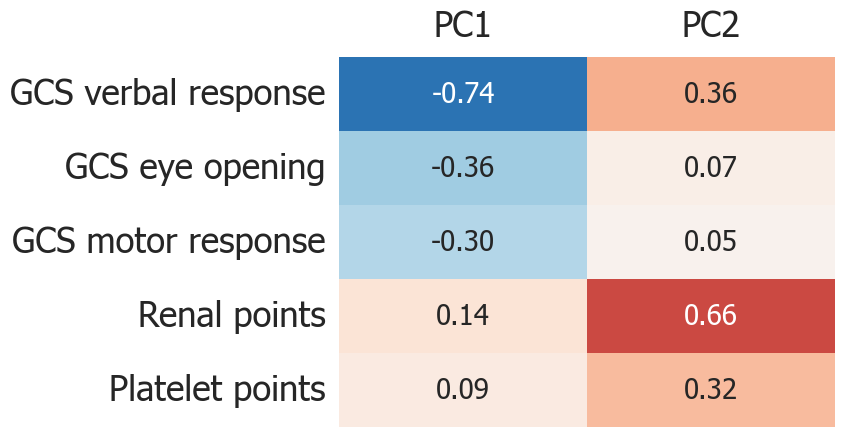

In [43]:
sns.heatmap(
    loadings.loc[top_features_combined, pc_list[:max(4, num_pc)]], 
    annot=True, cmap='RdBu_r', annot_kws={'size': 20}, fmt='.2f', 
    center=0, cbar_kws={'label': 'Loading'}, vmax=1, vmin=-1, cbar=False, 
    yticklabels=['GCS verbal response', 'GCS eye opening', 'GCS motor response', 'Renal points', 'Platelet points']
)
plt.ylabel('')
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

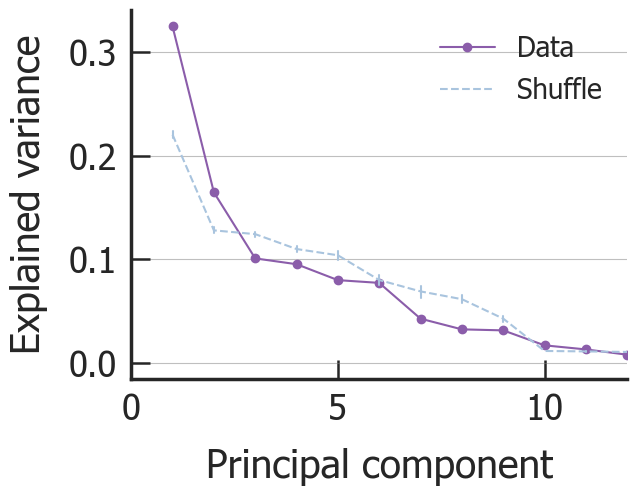

In [44]:
feature_set = 'sofs+vtls+dmos'
n_boot = 100

# fig, ax = plt.subplots(1,1, figsize=plots.stdfigsize(1,1))

data, _ = load_and_prepare_dataset(dataset='mimic', feature_set=feature_set, \
                                imputation_strategy='Complete_cases', scaler_name='MM', holdout=.5)
num_pc = data.shape[1]-1
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])

data_boot = data_bootstrap(data, n_boot, se=9)
df = pd.DataFrame()
for boot in range(n_boot):
    data_boot_ = data_boot[boot]
    data_v = PCA(n_components=data_boot_.shape[1]-1).fit(data_boot_.iloc[:,:-1]).explained_variance_ratio_
    shuffle_v = PCA().fit(data_randomize(data_boot_.iloc[:,:-1])).explained_variance_ratio_
    df = pd.concat([df, pd.DataFrame({'Data':data_v, 'Shuffle':shuffle_v, 'Principal component':list(range(1, data_boot_.shape[1])), 'Boot':boot})])
df = df.assign(dif_info = lambda x: x.Data - x.Shuffle)


plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, label='Data', marker='o', color='#8b5daa')
plt.xlim([0, 12])
sns.lineplot(
    data=df, x='Principal component', y='Shuffle', 
    errorbar=lambda x: np.percentile(x, [5,95]), err_style='bars', 
    label='Shuffle', linestyle='--', color='#a9c4de'
)
plt.legend(frameon=False)
plt.ylabel('Explained variance')
plt.grid(True, axis='y', c='Gray', alpha=.5)
# ax.set_xticks(range(0, 12, 2))

In [45]:
num_pc = 2
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])
loadings = pca.components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pcaX = pd.DataFrame(pcaX, columns=pc_list, index=data.index)
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['variable'] = data.iloc[:,:-1].columns.values
loadings = loadings.set_index('variable')

In [46]:
top_features_combined = [
    'gcs_verbal',
    'gcs_eyes',
    'gcs_motor',
    'renal_24hours',
    'coagulation_24hours'
]

Text(11.27777777777776, 0.5, '')

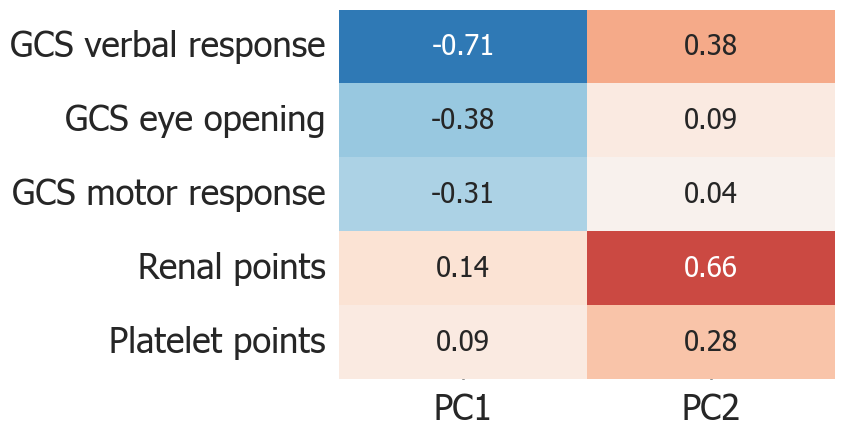

In [47]:
sns.heatmap(
    loadings.loc[top_features_combined, pc_list[:max(4, num_pc)]], 
    annot=True, cmap='RdBu_r', annot_kws={'size': 20}, fmt='.2f', 
    center=0, cbar_kws={'label': 'Loading'}, vmax=1, vmin=-1, cbar=False, 
    yticklabels=['GCS verbal response', 'GCS eye opening', 'GCS motor response', 'Renal points', 'Platelet points']
)
plt.ylabel('')

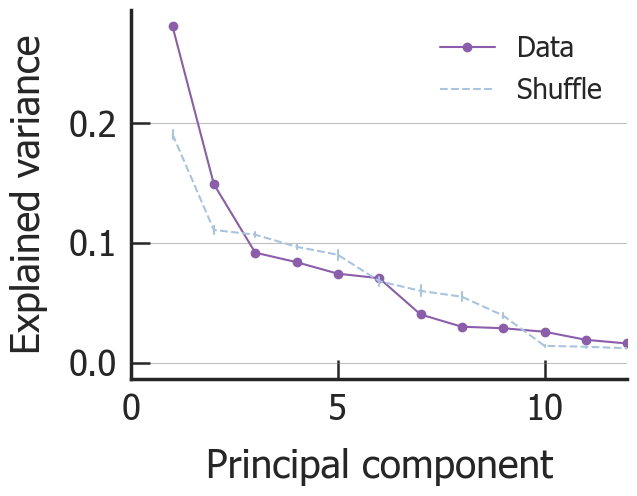

In [48]:
feature_set = 'sofs+vtls+dmos+lbs1'
n_boot = 100

# fig, ax = plt.subplots(1,1, figsize=plots.stdfigsize(1,1))

data, _ = load_and_prepare_dataset(dataset='mimic', feature_set=feature_set, \
                                imputation_strategy='Complete_cases', scaler_name='MM', holdout=.5)
num_pc = data.shape[1]-1
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])

data_boot = data_bootstrap(data, n_boot, se=9)
df = pd.DataFrame()
for boot in range(n_boot):
    data_boot_ = data_boot[boot]
    data_v = PCA(n_components=data_boot_.shape[1]-1).fit(data_boot_.iloc[:,:-1]).explained_variance_ratio_
    shuffle_v = PCA().fit(data_randomize(data_boot_.iloc[:,:-1])).explained_variance_ratio_
    df = pd.concat([df, pd.DataFrame({'Data':data_v, 'Shuffle':shuffle_v, 'Principal component':list(range(1, data_boot_.shape[1])), 'Boot':boot})])
df = df.assign(dif_info = lambda x: x.Data - x.Shuffle)


plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, label='Data', marker='o', color='#8b5daa')
plt.xlim([0, 12])
sns.lineplot(
    data=df, x='Principal component', y='Shuffle', 
    errorbar=lambda x: np.percentile(x, [5,95]), err_style='bars', 
    label='Shuffle', linestyle='--', color='#a9c4de'
)
plt.legend(frameon=False)
plt.ylabel('Explained variance')
plt.grid(True, axis='y', c='Gray', alpha=.5)
# ax.set_xticks(range(0, 12, 2))

In [49]:
num_pc = 2
pca = PCA(n_components=num_pc)
pcaX = pca.fit_transform(data.iloc[:,:-1])
loadings = pca.components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pcaX = pd.DataFrame(pcaX, columns=pc_list, index=data.index)
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings['variable'] = data.iloc[:,:-1].columns.values
loadings = loadings.set_index('variable')

In [50]:
top_features_combined = [
    'gcs_verbal',
    'gcs_eyes',
    'gcs_motor',
    'renal_24hours',
    'coagulation_24hours'
]

Text(11.27777777777776, 0.5, '')

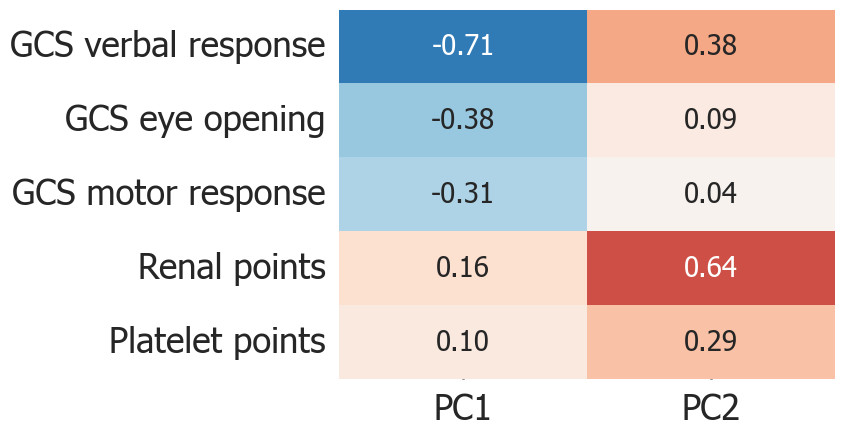

In [51]:
sns.heatmap(
    loadings.loc[top_features_combined, pc_list[:max(4, num_pc)]], 
    annot=True, cmap='RdBu_r', annot_kws={'size': 20}, fmt='.2f', 
    center=0, cbar_kws={'label': 'Loading'}, vmax=1, vmin=-1, cbar=False, 
    yticklabels=['GCS verbal response', 'GCS eye opening', 'GCS motor response', 'Renal points', 'Platelet points']
)
plt.ylabel('')